In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Experimento para entender sobre Regularizaçao

Neste exemplo, iremos fazer um experimento para fixar o conceito de regularizaçao. Lembrando que regularizaçào é um conceito profundo e importante. Aqui feremos um exeperimento simples para entendimento geral da ideia.

No experimento iremos utilizar uma rede densa com ativações guassianas chamada RBF (Radial Basis Function). Ela ilustra bem o conceito de regularização e overfit.

Iremos treinar uma rede SEM regularização e depois COM regularização e iremos comparar os resultados.

- As redes RBF são simples de treinar. Aqui são funções auxiliares que realizam as operações básicas

In [ ]:
def generateData(f, N=32):

    x = np.linspace(-10.0, 10.0, N)
    y = f(x)

    idx = np.random.rand(len(x))

    x_train = x[idx>0.5]
    y_train = f(x_train) + np.random.randn(x_train.shape[0])*0.6

    x_test = x[idx<0.5]
    y_test = f(x_test) + np.random.randn(x_test.shape[0])*0.6

    return x, y, x_train, y_train, x_test, y_test

In [ ]:
def train(x_train, y_train, NCenters=10, sigma2=1.0, lamb=0.0):

    NTrain = len(x_train)

    x_train = x_train.reshape(NTrain,1)
    y_train = y_train.reshape(NTrain,1)

    centers = np.random.choice(x_train[:,0],NCenters).reshape((1,NCenters))

    inputs = centers-x_train

    features = np.exp(-inputs**2/sigma2)

    M = features.T@features + lamb*np.eye(NCenters)

    model = np.linalg.inv(M)@features.T@y_train

    return centers, sigma2, model

def predict(x_test, centers, sigma2, model):

    NCenters = centers.shape[1]

    x_test = x_test.reshape(len(x_test),1)

    inputs = centers-x_test

    features = np.exp(-inputs**2/sigma2)

    y = features@model

    return y



In [ ]:
f = lambda x:0.01*(x-8.0)*x*(x+8.0)
x, y, x_train, y_train, x_test, y_test = generateData(f, N=128)

### Modelo não-regularizado (complexo)

Oque observar:

- Erro treino baixo
- Erro de validação alto
- Bias baixo, mas variância alta

In [ ]:
# treinamento do modelo

centers, sigma2, model = train(x_train, y_train, NCenters=256, sigma2=0.1, lamb=0.01)

In [ ]:
# predição com os conjuntos de treino e teste

y_testHat = predict(x_test, centers, sigma2, model)
y_trainHat = predict(x_train, centers, sigma2, model)
yHat = predict(x, centers, sigma2, model)

e_train = y_train - y_trainHat[:,0]
e_test = y_test - y_testHat[:,0]

erro de treino: 0.029094926102611825
erro de teste 1.9956523956851246


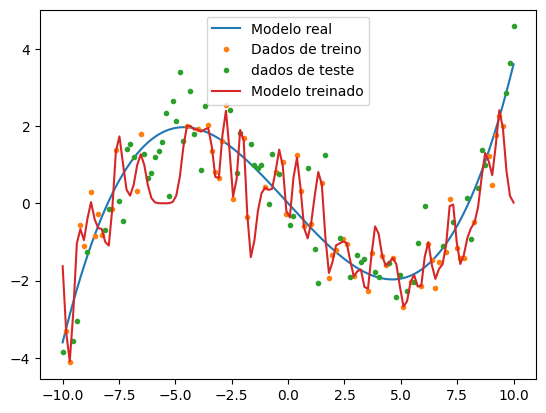

In [ ]:
plt.plot(x, y)
plt.plot(x_train, y_train, '.')
plt.plot(x_test, y_test, '.')
plt.plot(x, yHat)
plt.legend(['Modelo real','Dados de treino', 'dados de teste', 'Modelo treinado'])

print(f'erro de treino: {np.mean(e_train**2)}')
print(f'erro de teste {np.mean(e_test**2)}')

### Modelo regularizado

Oque observar:

- Erro treino um pouco mais alto
- Erro de validação perto do erro de traino
- Bias um pouco mais alto, porem variância baixa

In [ ]:
# treinamento do modelo

centers_reg, sigma2_reg, model_reg = train(x_train, y_train, NCenters=256, sigma2=10, lamb=.4)

In [ ]:
# predição com os conjuntos de treino e teste

y_testHat_reg = predict(x_test, centers_reg, sigma2_reg, model_reg)
y_trainHat_reg = predict(x_train, centers_reg, sigma2_reg, model_reg)
yHat_reg = predict(x, centers_reg, sigma2_reg, model_reg)

e_train_reg = y_train - y_trainHat_reg[:,0]
e_test_reg = y_test - y_testHat_reg[:,0]

erro de treino: 0.4944086483551765
erro de teste 0.7876623989709387


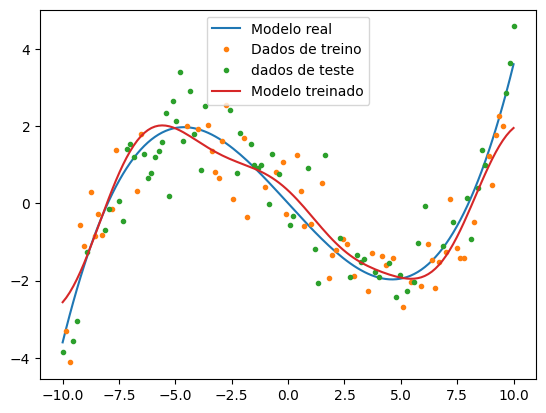

In [ ]:
plt.plot(x, y)
plt.plot(x_train, y_train, '.')
plt.plot(x_test, y_test, '.')
plt.plot(x, yHat_reg)
plt.legend(['Modelo real','Dados de treino', 'dados de teste', 'Modelo treinado'])

print(f'erro de treino: {np.mean(e_train_reg**2)}')
print(f'erro de teste {np.mean(e_test_reg**2)}')